**Settings**

In [1]:
#import librosa
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import librosa.display
#import keras
#import datetime
#import seaborn as sns
#from sklearn.preprocessing import LabelEncoder 
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report

#plt.style.use('ggplot')
#plt.rcParams['font.family'] = 'sans-serif' 
#plt.rcParams['font.serif'] = 'Ubuntu' 
#plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
#plt.rcParams['font.size'] = 14 
#plt.rcParams['axes.labelsize'] = 12 
#plt.rcParams['axes.labelweight'] = 'bold' 
#plt.rcParams['axes.titlesize'] = 12 
#plt.rcParams['xtick.labelsize'] = 12 
#plt.rcParams['ytick.labelsize'] = 12 
#plt.rcParams['legend.fontsize'] = 12 
#plt.rcParams['figure.titlesize'] = 12 
#plt.rcParams['image.cmap'] = 'jet' 
#plt.rcParams['image.interpolation'] = 'none' 
#plt.rcParams['figure.figsize'] = (10, 10) 
#plt.rcParams['axes.grid']=False
#plt.rcParams['lines.linewidth'] = 2 
#plt.rcParams['lines.markersize'] = 8
#colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
#'xkcd:scarlet']
#bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)"""

In [2]:
#requisits and ignore warnings
import warnings
warnings.simplefilter('ignore')

import fnmatch
import collections
import keras
import librosa
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import models, layers
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot, cm
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

2023-01-16 19:03:55.045783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 19:03:55.168482: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-16 19:03:55.168500: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-16 19:03:55.193140: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-16 19:03:55.768965: W tensorflow/stream_executor/platform/de

In [3]:
# y,sr = librosa.load('audios/Speaker26_000.wav')
# dur_time = librosa.get_duration(y=y,sr=sr)
#print(dur_time)
#time_sec = round(dur_time)
#S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=20, fmax=8000)
#fig, ax = plt.subplots()
#S_dB = librosa.power_to_db(S, ref=np.max)
#img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000, ax=ax)
#fig.colorbar(img, ax=ax, format='%+2.0f dB')
#ax.set(title='Mel-frequency spectrogram')
#plt.xlim()"""

In [4]:
#time_series_sec=np.linspace(0, time_sec, len(S_dB[0]))

The output of this section is the CSV files with the data to be handle by the model

```
trainData     : audio/train 
testData      : audio/test
```


In [5]:
# Defines the names of the CSV files
TRAIN_CSV_FILE = "train.csv"
TEST_CSV_FILE = "test.csv"
final_test="final_test.csv"

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os
from tqdm import tqdm
import warnings
warnings.simplefilter('ignore')

def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    count=0
    for filename in tqdm(os.listdir(soundFilesFolder)):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=30)
        # remove leading and trailing silence
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        speaker = int(filename.split("_")[0].split("r")[1])
        """if(speaker>0):
            speaker = 1
            ext=str(count).zfill(3)+".wav"
            count=count+1
        else:
            speaker = int(filename.split("_")[0].split("r")[1])
            ext = filename.split("_")[1]
        filename = 'Speaker'+str(speaker).zfill(4)+'_'+str(ext)"""
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")
    

In [7]:
#extractWavFeatures("new_audios/train", TRAIN_CSV_FILE)
#extractWavFeatures("new_audios/test", TEST_CSV_FILE)
extractWavFeatures("audios/audios/train", TRAIN_CSV_FILE)
extractWavFeatures("audios/audios/test", TEST_CSV_FILE)
print("CSV files are created")

The features of the files in the folder audios/audios/train will be saved to train.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


100%|██████████████████████████████████████████████████| 3319/3319 [16:51<00:00,  3.28it/s]


End of extractWavFeatures
The features of the files in the folder audios/audios/test will be saved to test.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


100%|████████████████████████████████████████████████████| 858/858 [04:13<00:00,  3.38it/s]

End of extractWavFeatures
CSV files are created


In [8]:
import pandas as pd
import csv
from sklearn import preprocessing

def preProcessData(csvFileName):
    print(csvFileName+ " will be preprocessed")
    data = pd.read_csv(csvFileName)
    filenameArray = data['filename'] 
    speakerArray = []
    #print(filenameArray)
    for i in range(len(filenameArray)):
        #speaker = int(filenameArray[i].split("_")[0].split("r")[1])
        #if(speaker<55):
        #    speaker = 0
        #else:
        #    speaker= int(filenameArray[i].split("_")[0].split("r")[1])-54
        speaker = int(filenameArray[i].split("_")[0].split("r")[1])
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Preprocessing is finished")
    print(data.head())
    return data



In [9]:
trainData = preProcessData(TRAIN_CSV_FILE)

testData = preProcessData(TEST_CSV_FILE)
print(trainData)
#print(testData.shape)

train.csv will be preprocessed
Preprocessing is finished
       rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0  0.044474        2925.986137         2426.865665  5365.750887   
1  0.007040        1054.481600          969.009484  2158.703613   
2  0.059307         644.962153          689.094968  1064.355469   
3  0.033733        1679.723927         1658.148768  3240.135427   
4  0.034633        1303.101750         1210.428356  2418.177044   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  \
0            0.170812 -292.403381   69.789474 -19.889078   4.436610   
1            0.055127 -541.293884  209.900482 -59.150311  35.763649   
2            0.034738 -379.739685  229.126648 -13.465721   7.315946   
3            0.116656 -384.844421  104.027542  -0.869874  44.156509   
4            0.083430 -420.164368  131.315445   6.856723  27.124081   

       mfcc5  ...     mfcc12     mfcc13    mfcc14     mfcc15     mfcc16  \
0  -3.878308  ...  -2.387268  -6.74580

In [10]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=50)


X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]
print(set(y_train))

print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
Y from training data: (2323,)
Y from validation data: (996,)
Y from test data: (858,)


In [11]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)

print(set(y_train))


X from training data (2323, 25)
X from validation data (996, 25)
X from test data (858, 25)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}


In [58]:
import os
import fnmatch
import collections
weight={}
path='audios/audios/56_speakers_audio_data'
for speaker in os.listdir(path):
    if speaker.find(".sh")==-1:
        dir_path=path+'/'+speaker
        speaker = int(speaker.split("_")[0].split("r")[1])
        """if(speaker<55):
            speaker = 0
        else:
            speaker= int(filenameArray[i].split("_")[0].split("r")[1])-54"""
        count = int(len(fnmatch.filter(os.listdir(dir_path), '*.*'))*0.8)-1
        weight.update({speaker: count})
max_value=sum(weight.values())
print("Sum of values: "+str(max_value))
weight = {key: value for key, value in sorted(weight.items())}
print(weight)
class_weight = {k: 1-(v/max_value) for k, v in weight.items()}
print(class_weight)
#print(set(range(57)) - set(y_train))

Sum of values: 399
{0: 73, 1: 93, 2: 95, 3: 67, 4: 71, 5: 56, 6: 59, 7: 48, 8: 78, 9: 51, 10: 42, 11: 51, 12: 26, 13: 28, 14: 39, 15: 29, 16: 37, 17: 34, 18: 31, 19: 25, 20: 399, 21: 45, 22: 399, 23: 30, 24: 42, 25: 38, 26: 35, 27: 36, 28: 46, 29: 23, 30: 25, 31: 36, 32: 28, 33: 27, 34: 26, 35: 24, 36: 25, 37: 43, 38: 26, 39: 39, 40: 24, 41: 24, 42: 31, 43: 26, 44: 28, 45: 32, 46: 29, 47: 26, 48: 23, 49: 39, 50: 25, 51: 23, 52: 23, 53: 23, 54: 399, 55: 7, 56: 7, 57: 7, 58: 7, 59: 7, 60: 7, 61: 15}
{0: 0.8170426065162908, 1: 0.7669172932330828, 2: 0.7619047619047619, 3: 0.8320802005012531, 4: 0.8220551378446115, 5: 0.8596491228070176, 6: 0.8521303258145363, 7: 0.8796992481203008, 8: 0.8045112781954887, 9: 0.8721804511278195, 10: 0.8947368421052632, 11: 0.8721804511278195, 12: 0.9348370927318296, 13: 0.9298245614035088, 14: 0.9022556390977443, 15: 0.9273182957393484, 16: 0.9072681704260652, 17: 0.9147869674185464, 18: 0.9223057644110275, 19: 0.93734335839599, 20: 0.0, 21: 0.8872180451127

weight={0:15, 1:42}

max_value=sum(weight.values())
print("Sum of values: "+str(max_value))
weight = {key: value for key, value in sorted(weight.items())}
print(weight)
class_weight = {k: (1-(v/max_value))*100 for k, v in weight.items()}
print(class_weight)

In [15]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(y_train), activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
#es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
print(X_train.shape)
#Train with early stopping to avoid overfitting
y_train=np.array(y_train, dtype=int)
y_val=np.array(y_val, dtype=int)
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=100,batch_size=128, class_weight=class_weight, callbacks=[es])
print(set(y_test))

(2323, 25)
Epoch 1/100
19/19 [==============================] - 1s 14ms/step - loss: 6.9054 - accuracy: 0.0689 - val_loss: 5.7852 - val_accuracy: 0.2239
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 4.0638 - accuracy: 0.1429 - val_loss: 2.8804 - val_accuracy: 0.2319
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 3.1842 - accuracy: 0.1950 - val_loss: 2.5825 - val_accuracy: 0.4076
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 2.9043 - accuracy: 0.2514 - val_loss: 2.3376 - val_accuracy: 0.4618
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 2.6623 - accuracy: 0.2953 - val_loss: 2.1006 - val_accuracy: 0.5131
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 2.4346 - accuracy: 0.3582 - val_loss: 1.8534 - val_accuracy: 0.5251
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 2.2019 - accuracy: 0.3995 - val_loss: 1.6294 - val_accuracy: 0.5612
E

Epoch 59/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5004 - accuracy: 0.8188 - val_loss: 0.1675 - val_accuracy: 0.9538
Epoch 60/100
19/19 [==============================] - 0s 6ms/step - loss: 0.4904 - accuracy: 0.8295 - val_loss: 0.1686 - val_accuracy: 0.9558
Epoch 61/100
19/19 [==============================] - 0s 6ms/step - loss: 0.4662 - accuracy: 0.8304 - val_loss: 0.1798 - val_accuracy: 0.9528
Epoch 62/100
19/19 [==============================] - 0s 6ms/step - loss: 0.4763 - accuracy: 0.8334 - val_loss: 0.1730 - val_accuracy: 0.9548
Epoch 63/100
19/19 [==============================] - 0s 6ms/step - loss: 0.4692 - accuracy: 0.8313 - val_loss: 0.1658 - val_accuracy: 0.9558
Epoch 63: early stopping
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}


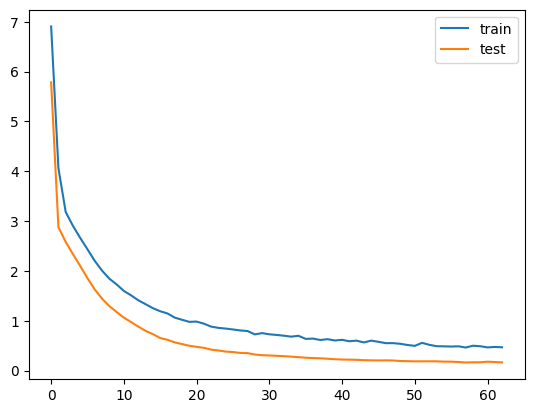

In [16]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [53]:
def getSpeaker(speaker):
    speaker = "Speaker"+str(speaker).zfill(3)
    return speaker
    
        
def printPrediction(X_data, y_data, printDigit, model):
    print('\n# Generate predictions')
    for i in range(len(y_data)):
        predict_x=model.predict(X_data[i:i+1])[0]
        predict_classes = np.argmax(predict_x)
        print(predict_classes)
        print(max(predict_x))
        prediction = getSpeaker(predict_classes)
    
        speaker = getSpeaker(y_data[i])
        if printDigit == True:
           print("Number={0:d}, y={1:10s}- prediction={2:10s}- match={3}".format(i, speaker, prediction, speaker==prediction))
        else:
           print("y={0:10s}- prediction={1:10s}- match={2}".format(speaker, prediction, speaker==prediction))

In [54]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

def report(X_data, y_data):
    #Confution Matrix and Classification Report
    predict_y = model.predict_prob(X_data)
    Y_pred = np.argmax(predict_y, axis=1)
    y_test_num = y_data.astype(np.int64)
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt[len(set(y_test_num))-1])
    key=0
    for val in conf_mt[len(set(y_test_num))-1]:
        if val!=0:
            print(key)
        key=key+1
    conf_mt=conf_mt / conf_mt.astype(np.float).sum(axis=1)
    #print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    print('\nClassification Report')
    print(classification_report(y_test_num, Y_pred))


In [55]:
print(y_test)

[32 54 13 48  1 19  0 52 20 44 30 54  9  2 18 20 45 20 16  9  0 15  7 19
 37  5 14  5 54 49  3  1 57 13 10 24  1 12 33 25 37 50 54 11  1 54  4 48
 54 37 45  1 20 54 22  2 22 54 32  2 36 48 39 40 54 38  4 22 20 24  5  6
 22 20 11 45 28 22 14  6 54 36 54  0  8  8 20 22  2 20 17 43  7  4 20 54
 54  5 46 11  0 18 42 28 11  5 39 43 54  6 12  2  1 20  7  1  0 20 54 42
  9 20 54 59 54  3 38 20  3 21 29 22 52  1 50 22  7 22 20 61 46 54 27 20
 31 20  4 27 26 54 22  6 52 54 20 37 22  8  0  6  3 26 20 41 17 56  5 22
 54 16 26  2  1 22 34 58 10  5 54 18  9 11 44 22 11  1  8 36 10 54  6 46
 17 54 22 26 54 20 32 30 54 54  7 24 54 10 54 33 20 54 22  2 19 20 32 20
 24 22 22 14 22 50 22 20  2  1  9 22  6 54  5 13 20 54 46 17 18 53 15 54
 49 28 31 17 25 20 54 53 22 20  2 10 20 22 47 27 24 54 20 54  2  6 34 22
 31  2 22 54 20  2 38 51 22 20 20 20 48  1 39 20 22 22  4 22 22 34 22 47
 30 60 54 55 31 10 22 22  3 54 50 39 53 19 41 20 22 24 23 47 20  1 12 22
 58 35 39  1 22 34 55  1  8 22 16 22 22 54 54 17 22

In [56]:
print('\n# TEST DATA #\n')
y_test=np.array(y_test, dtype=int)
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
# Prediction
printPrediction(X_test, y_test, False, model)


# TEST DATA #

27/27 [==============================] - 0s 2ms/step - loss: 1.1372 - accuracy: 0.9161
accuracy: 91.61%

# Generate predictions
1/1 [==============================] - 0s 14ms/step
43
0.60394156
y=Speaker032- prediction=Speaker043- match=False
1/1 [==============================] - 0s 15ms/step
54
0.98971736
y=Speaker054- prediction=Speaker054- match=True
1/1 [==============================] - 0s 17ms/step
13
0.9763689
y=Speaker013- prediction=Speaker013- match=True
1/1 [==============================] - 0s 15ms/step
48
0.8862796
y=Speaker048- prediction=Speaker048- match=True
1/1 [==============================] - 0s 17ms/step
6
0.4410624
y=Speaker001- prediction=Speaker006- match=False
1/1 [==============================] - 0s 17ms/step
19
0.89024436
y=Speaker019- prediction=Speaker019- match=True
1/1 [==============================] - 0s 17ms/step
0
0.89732635
y=Speaker000- prediction=Speaker000- match=True
1/1 [==============================] - 0s 16ms/step
52
0.4676

1/1 [==============================] - 0s 17ms/step
2
0.54731685
y=Speaker006- prediction=Speaker002- match=False
1/1 [==============================] - 0s 17ms/step
22
0.9999999
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 16ms/step
20
0.9999995
y=Speaker020- prediction=Speaker020- match=True
1/1 [==============================] - 0s 17ms/step
61
0.89398926
y=Speaker011- prediction=Speaker061- match=False
1/1 [==============================] - 0s 17ms/step
42
0.52644515
y=Speaker045- prediction=Speaker042- match=False
1/1 [==============================] - 0s 16ms/step
28
0.9995734
y=Speaker028- prediction=Speaker028- match=True
1/1 [==============================] - 0s 16ms/step
54
0.9990532
y=Speaker022- prediction=Speaker054- match=False
1/1 [==============================] - 0s 17ms/step
14
0.9151044
y=Speaker014- prediction=Speaker014- match=True
1/1 [==============================] - 0s 18ms/step
2
0.5669193
y=Speaker006- prediction=S

1/1 [==============================] - 0s 16ms/step
31
0.8901228
y=Speaker031- prediction=Speaker031- match=True
1/1 [==============================] - 0s 16ms/step
20
0.99999976
y=Speaker020- prediction=Speaker020- match=True
1/1 [==============================] - 0s 16ms/step
4
0.52344036
y=Speaker004- prediction=Speaker004- match=True
1/1 [==============================] - 0s 16ms/step
27
0.99682236
y=Speaker027- prediction=Speaker027- match=True
1/1 [==============================] - 0s 15ms/step
26
0.97658134
y=Speaker026- prediction=Speaker026- match=True
1/1 [==============================] - 0s 17ms/step
54
0.9997553
y=Speaker054- prediction=Speaker054- match=True
1/1 [==============================] - 0s 17ms/step
22
1.0
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 16ms/step
2
0.510325
y=Speaker006- prediction=Speaker002- match=False
1/1 [==============================] - 0s 16ms/step
52
0.9852406
y=Speaker052- prediction=Speaker052

1/1 [==============================] - 0s 15ms/step
22
0.9968533
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 17ms/step
22
1.0
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 16ms/step
14
0.90375173
y=Speaker014- prediction=Speaker014- match=True
1/1 [==============================] - 0s 16ms/step
22
1.0
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 17ms/step
39
0.60279113
y=Speaker050- prediction=Speaker039- match=False
1/1 [==============================] - 0s 17ms/step
22
1.0
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 16ms/step
20
0.9999999
y=Speaker020- prediction=Speaker020- match=True
1/1 [==============================] - 0s 17ms/step
2
0.5652272
y=Speaker002- prediction=Speaker002- match=True
1/1 [==============================] - 0s 17ms/step
1
0.79548246
y=Speaker001- prediction=Speaker001- match=True

54
0.99482405
y=Speaker054- prediction=Speaker054- match=True
1/1 [==============================] - 0s 17ms/step
55
0.34206936
y=Speaker055- prediction=Speaker055- match=True
1/1 [==============================] - 0s 16ms/step
31
0.89405966
y=Speaker031- prediction=Speaker031- match=True
1/1 [==============================] - 0s 16ms/step
10
0.99798334
y=Speaker010- prediction=Speaker010- match=True
1/1 [==============================] - 0s 18ms/step
22
1.0
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 15ms/step
22
1.0
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 16ms/step
3
0.961474
y=Speaker003- prediction=Speaker003- match=True
1/1 [==============================] - 0s 17ms/step
54
0.9999665
y=Speaker054- prediction=Speaker054- match=True
1/1 [==============================] - 0s 16ms/step
50
0.99096686
y=Speaker050- prediction=Speaker050- match=True
1/1 [==============================] - 0s 17

1/1 [==============================] - 0s 20ms/step
4
0.8607955
y=Speaker004- prediction=Speaker004- match=True
1/1 [==============================] - 0s 19ms/step
54
0.9951866
y=Speaker054- prediction=Speaker054- match=True
1/1 [==============================] - 0s 19ms/step
41
0.731788
y=Speaker041- prediction=Speaker041- match=True
1/1 [==============================] - 0s 20ms/step
36
0.9871917
y=Speaker036- prediction=Speaker036- match=True
1/1 [==============================] - 0s 20ms/step
18
0.9117442
y=Speaker018- prediction=Speaker018- match=True
1/1 [==============================] - 0s 20ms/step
4
0.9090931
y=Speaker004- prediction=Speaker004- match=True
1/1 [==============================] - 0s 19ms/step
28
0.9988814
y=Speaker028- prediction=Speaker028- match=True
1/1 [==============================] - 0s 20ms/step
24
0.9850427
y=Speaker024- prediction=Speaker024- match=True
1/1 [==============================] - 0s 19ms/step
22
0.99999106
y=Speaker022- prediction=Speaker0

1/1 [==============================] - 0s 19ms/step
20
0.99999917
y=Speaker020- prediction=Speaker020- match=True
1/1 [==============================] - 0s 20ms/step
26
0.9842354
y=Speaker026- prediction=Speaker026- match=True
1/1 [==============================] - 0s 20ms/step
31
0.59090114
y=Speaker031- prediction=Speaker031- match=True
1/1 [==============================] - 0s 18ms/step
42
0.9800985
y=Speaker042- prediction=Speaker042- match=True
1/1 [==============================] - 0s 19ms/step
54
0.9943546
y=Speaker054- prediction=Speaker054- match=True
1/1 [==============================] - 0s 20ms/step
22
1.0
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 18ms/step
22
1.0
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 19ms/step
42
0.97671825
y=Speaker042- prediction=Speaker042- match=True
1/1 [==============================] - 0s 19ms/step
42
0.9851538
y=Speaker042- prediction=Speaker042- mat

1/1 [==============================] - 0s 18ms/step
0
0.79017276
y=Speaker000- prediction=Speaker000- match=True
1/1 [==============================] - 0s 17ms/step
11
0.99966586
y=Speaker011- prediction=Speaker011- match=True
1/1 [==============================] - 0s 16ms/step
54
0.99661726
y=Speaker054- prediction=Speaker054- match=True
1/1 [==============================] - 0s 16ms/step
20
0.99999976
y=Speaker020- prediction=Speaker020- match=True
1/1 [==============================] - 0s 17ms/step
4
0.81713593
y=Speaker004- prediction=Speaker004- match=True
1/1 [==============================] - 0s 17ms/step
54
0.9945247
y=Speaker054- prediction=Speaker054- match=True
1/1 [==============================] - 0s 17ms/step
8
0.97717255
y=Speaker008- prediction=Speaker008- match=True
1/1 [==============================] - 0s 17ms/step
35
0.99706596
y=Speaker035- prediction=Speaker035- match=True
1/1 [==============================] - 0s 19ms/step
26
0.9831586
y=Speaker026- prediction=Sp

1/1 [==============================] - 0s 17ms/step
25
0.9700703
y=Speaker025- prediction=Speaker025- match=True
1/1 [==============================] - 0s 16ms/step
48
0.90782076
y=Speaker048- prediction=Speaker048- match=True
1/1 [==============================] - 0s 18ms/step
21
0.99132526
y=Speaker021- prediction=Speaker021- match=True
1/1 [==============================] - 0s 17ms/step
15
0.99102694
y=Speaker015- prediction=Speaker015- match=True
1/1 [==============================] - 0s 16ms/step
54
0.82392436
y=Speaker054- prediction=Speaker054- match=True
1/1 [==============================] - 0s 17ms/step
26
0.9732582
y=Speaker026- prediction=Speaker026- match=True
1/1 [==============================] - 0s 17ms/step
20
1.0
y=Speaker020- prediction=Speaker020- match=True
1/1 [==============================] - 0s 15ms/step
22
1.0
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 17ms/step
22
1.0
y=Speaker022- prediction=Speaker022- match=Tr

1/1 [==============================] - 0s 17ms/step
40
0.7380971
y=Speaker032- prediction=Speaker040- match=False
1/1 [==============================] - 0s 16ms/step
3
0.9705366
y=Speaker003- prediction=Speaker003- match=True
1/1 [==============================] - 0s 17ms/step
54
0.99997914
y=Speaker054- prediction=Speaker054- match=True
1/1 [==============================] - 0s 15ms/step
8
0.98485386
y=Speaker008- prediction=Speaker008- match=True
1/1 [==============================] - 0s 17ms/step
14
0.8549171
y=Speaker014- prediction=Speaker014- match=True
1/1 [==============================] - 0s 17ms/step
11
0.9145676
y=Speaker011- prediction=Speaker011- match=True
1/1 [==============================] - 0s 15ms/step
25
0.9945627
y=Speaker025- prediction=Speaker025- match=True
1/1 [==============================] - 0s 17ms/step
14
0.76563704
y=Speaker014- prediction=Speaker014- match=True
1/1 [==============================] - 0s 18ms/step
31
0.8572404
y=Speaker031- prediction=Spea

1/1 [==============================] - 0s 16ms/step
49
0.98392165
y=Speaker049- prediction=Speaker049- match=True
1/1 [==============================] - 0s 16ms/step
22
0.9999993
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 17ms/step
4
0.83941126
y=Speaker004- prediction=Speaker004- match=True
1/1 [==============================] - 0s 16ms/step
10
0.9972837
y=Speaker010- prediction=Speaker010- match=True
1/1 [==============================] - 0s 16ms/step
22
0.99999607
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 17ms/step
54
0.9850744
y=Speaker054- prediction=Speaker054- match=True
1/1 [==============================] - 0s 17ms/step
22
0.9999534
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 16ms/step
35
0.9933444
y=Speaker035- prediction=Speaker035- match=True
1/1 [==============================] - 0s 17ms/step
54
0.9997894
y=Speaker054- prediction=Spea

1/1 [==============================] - 0s 17ms/step
10
0.9600777
y=Speaker010- prediction=Speaker010- match=True
1/1 [==============================] - 0s 16ms/step
43
0.5531144
y=Speaker032- prediction=Speaker043- match=False
1/1 [==============================] - 0s 17ms/step
3
0.9838785
y=Speaker003- prediction=Speaker003- match=True
1/1 [==============================] - 0s 16ms/step
19
0.898421
y=Speaker019- prediction=Speaker019- match=True
1/1 [==============================] - 0s 16ms/step
16
0.99904364
y=Speaker015- prediction=Speaker016- match=False
1/1 [==============================] - 0s 17ms/step
22
0.9999994
y=Speaker022- prediction=Speaker022- match=True
1/1 [==============================] - 0s 17ms/step
52
0.9852406
y=Speaker052- prediction=Speaker052- match=True
1/1 [==============================] - 0s 17ms/step
15
0.9913886
y=Speaker015- prediction=Speaker015- match=True
1/1 [==============================] - 0s 19ms/step
10
0.995265
y=Speaker010- prediction=Speake

Classification Report for Test Data

(858,)
(858, 25)
27/27 [==============================] - 0s 1ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
61


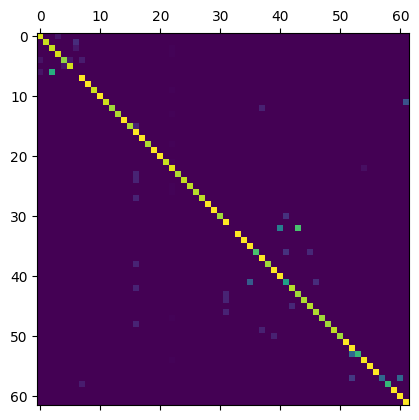


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       1.00      0.92      0.96        24
           2       0.59      0.92      0.72        24
           3       0.94      0.94      0.94        17
           4       0.94      0.83      0.88        18
           5       0.93      0.93      0.93        15
           6       0.00      0.00      0.00        16
           7       0.87      1.00      0.93        13
           8       1.00      1.00      1.00        20
           9       1.00      0.92      0.96        13
          10       1.00      1.00      1.00        11
          11       1.00      0.92      0.96        13
          12       1.00      0.86      0.92         7
          13       1.00      0.88      0.93         8
          14       1.00      1.00      1.00        11
          15       1.00      0.88      0.93         8
          16       0.59      1.00      0.74        10
    

In [21]:
print("Classification Report for Test Data\n")
print(y_test.shape)
print(X_test.shape)
report(X_test, y_test)

### Save model

In [22]:
import joblib
model.save('speaker-recognition.h5')
joblib.dump(scaler, 'scaler.save') 

['scaler.save']


Transfer learning

https://keras.io/guides/transfer_learning/


### Load model



def preProcessData(csvFileName):
    data = pd.read_csv(csvFileName)
    filenameArray = data['filename'] 
    speakerArray = []
    #print(filenameArray)
    for i in range(len(filenameArray)):
        speaker = int(filenameArray[i].split("_")[0].split("r")[1])
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape
    return data


def getSpeaker(speaker):
    speaker = "Speaker"+str(speaker).zfill(3)
    return speaker
    
        
def printPrediction(X_data, y_data, printDigit, model):
    print('\n# Generate predictions')
    for i in range(len(y_data)):
        predict_x=model.predict(X_data[i:i+1])[0]
        predict_classes = np.argmax(predict_x)
        prediction = getSpeaker(predict_classes)
    
        speaker = getSpeaker(y_data[i])
        if printDigit == True:
           print("Number={0:d}, y={1:10s}- prediction={2:10s}- match={3}".format(i, speaker, prediction, speaker==prediction))
        else:
           print("y={0:10s}- prediction={1:10s}- match={2}".format(speaker, prediction, speaker==prediction))

In [ ]:
def extractWavFeatures(filename, csvFileName):
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    number = f'new_audios/test_file/{filename}'
    y, sr = librosa.load(number, mono=True, duration=30)
    # remove leading and trailing silence
    y, index = librosa.effects.trim(y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    writer.writerow(to_append.split())
    file.close()
    

In [ ]:
def predict_audio(filename):
    extractWavFeatures(filename, final_test)
    final_testData = preProcessData(final_test)
    
    X_test = np.array(final_testData.iloc[:, :-1], dtype = float)
    y_test = final_testData.iloc[:, -1]
    
    X_test = scaler.transform( X_test )
    #y_test=np.array(y_test, dtype=int)
    
    score = new_model.evaluate(X_test, y_test)
    # Prediction
    printPrediction(X_test, y_test, False, new_model)
    print(y_test)

In [ ]:
from keras import models
from keras import layers
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import os
import librosa
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import joblib
import csv


final_test="final_test.csv"
model = keras.models.load_model('speaker-recognition.h5')
scaler = joblib.load('scaler.save') 

#predict_audio("Speaker0000_008.wav")


### Register


In [ ]:
TRAIN_CSV_FILE = "train.csv"
NEW_USER = "new_user.csv"
extractWavFeatures("new_audios/train", NEW_USER)


In [ ]:
dataFrame = pd.read_csv(NEW_USER)
dataFrame.to_csv(TRAIN_CSV_FILE, mode='a', index=False, header=False)

In [ ]:
trainData = preProcessData(TRAIN_CSV_FILE)
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=50)

print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)


In [ ]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)


In [ ]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(y_train), activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
print(X_train.shape)
#Train with early stopping to avoid overfitting
y_train=np.array(y_train, dtype=int)
y_val=np.array(y_val, dtype=int)
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=100,batch_size=1, callbacks=[es])
print(set(y_train))

In [ ]:
testData = preProcessData(TEST_CSV_FILE)

X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]
print(set(y_test))

X_test = scaler.transform( X_test )
print("X from test data", X_test.shape)

print(set(y_test))
print("Y from test data:", y_test.shape)


In [ ]:
print('\n# TEST DATA #\n')
y_test=np.array(y_test, dtype=int)
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
# Prediction
printPrediction(X_test, y_test, False, model)

In [ ]:
print("Classification Report for Test Data\n")
print(y_test.shape)
print(X_test.shape)
report(X_test, y_test)